<a href="https://colab.research.google.com/github/ABOURAYAN2019/ABOURAYAN2019/blob/main/regression_model_with_keras_Part_B_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries


In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Load the dataset

In [3]:
data_url = "https://cocl.us/concrete_data"
concrete_data = pd.read_csv(data_url)

Brief exploration

In [4]:
concrete_data.head()
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Split the data into predictors and target

In [5]:
X = concrete_data.drop(['Strength'], axis=1)
y = concrete_data['Strength']

Split the data into a training set and a test set //To normalize the data for Part B and see how it impacts the mean squared error (MSE) compared to Part A, We 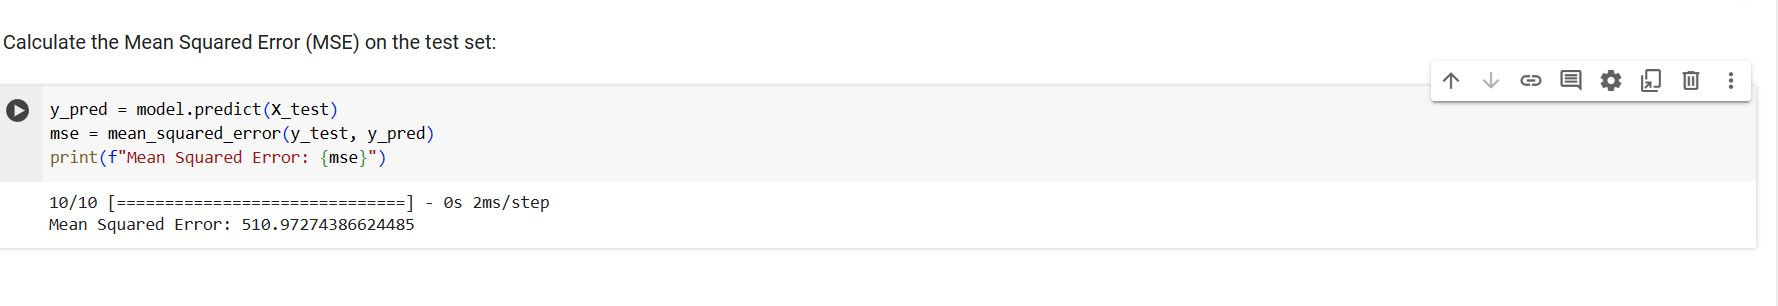follow these steps


In [6]:
from sklearn.preprocessing import StandardScaler

# Predictor variables
X = concrete_data.drop(['Strength'], axis=1)
y = concrete_data['Strength']

# Normalize the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

build a baseline model with one hidden layer //We can use the same model architecture from Part A.



In [7]:
def build_model():
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
model = build_model()

Train the model for 50 epochs

In [8]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=2)


Epoch 1/50
18/18 - 1s - loss: 1560.6868 - val_loss: 1579.2317 - 929ms/epoch - 52ms/step
Epoch 2/50
18/18 - 0s - loss: 1548.3545 - val_loss: 1566.8138 - 89ms/epoch - 5ms/step
Epoch 3/50
18/18 - 0s - loss: 1535.5917 - val_loss: 1554.2184 - 94ms/epoch - 5ms/step
Epoch 4/50
18/18 - 0s - loss: 1522.6177 - val_loss: 1541.2986 - 89ms/epoch - 5ms/step
Epoch 5/50
18/18 - 0s - loss: 1509.5439 - val_loss: 1527.7249 - 77ms/epoch - 4ms/step
Epoch 6/50
18/18 - 0s - loss: 1495.6694 - val_loss: 1513.9628 - 87ms/epoch - 5ms/step
Epoch 7/50
18/18 - 0s - loss: 1481.3416 - val_loss: 1499.6851 - 88ms/epoch - 5ms/step
Epoch 8/50
18/18 - 0s - loss: 1466.4791 - val_loss: 1484.6965 - 98ms/epoch - 5ms/step
Epoch 9/50
18/18 - 0s - loss: 1450.9982 - val_loss: 1468.9039 - 87ms/epoch - 5ms/step
Epoch 10/50
18/18 - 0s - loss: 1434.7417 - val_loss: 1452.3531 - 79ms/epoch - 4ms/step
Epoch 11/50
18/18 - 0s - loss: 1417.5720 - val_loss: 1435.3800 - 86ms/epoch - 5ms/step
Epoch 12/50
18/18 - 0s - loss: 1399.9512 - val_los

Calculate the Mean Squared Error (MSE) on the test set:


In [10]:
y_pred = model.predict(X_test)
mse_normalized = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with Normalized Data: {mse_normalized}")

10/10 [==============================] - 0s 2ms/step
Mean Squared Error with Normalized Data: 432.04163322060236


Observing the transition from an MSE of 510 to 432 illustrates the tangible impact of normalization. Notably, the efficiency of normalization is further highlighted by the early achievement of an MSE of 430 at just 18 epochs in Part B, compared to the MSE of 920 at the same epoch count in Part A. This comparison starkly demonstrates how normalization not only improves model accuracy but also accelerates the learning efficiency, achieving lower error rates much faster.



